# Project Goal

Our entire project can be found in the following repository:

Music is a topic that is extremely relevant in all of our daily lives, and we are very interested in taking a deeper dive into what goes into a song. Specifically, our goal for this project is to be able to classify genres of Spotify tracks based on their features. We are hoping to produce an accurate classification model to perform this task, and will be exploring various shallow and deep learning techniques in order to do so. Additionally, we will practice data integrity in our cleaning, training, and validating processes in order to produce reputable and insightful results.

# Initial Dataset Loading, Overview of Dataset



In [ ]:
import pandas as pd
df_orig = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


First let's see what our data table looks like, what features we are working with and how many samples we have.

In [ ]:
#first 5 rows
df_orig.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
#random sample of 10 rows
df_orig.sample(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
83062,83062,07nH4ifBxUB4lZcsf44Brn,Calvin Harris;John Newman,Motion,Blame (feat. John Newman),76,212960,False,0.414,0.85700,...,-4.078,0,0.0808,0.028700,0.005740,0.3430,0.34800,128.024,4,progressive-house
75638,75638,62f4CdO5UgtjIkq2o0Ezpm,Robert Haig Coxon,Passion… A Prelude To Love,From the Heart,22,160106,False,0.173,0.10800,...,-20.666,1,0.0394,0.975000,0.989000,0.1130,0.11900,117.956,4,new-age
67402,67402,5YZQDYnMUM9VFWBgmDBzmL,Brray;Rauw Alejandro,Última Misión Reggaeton,Te Pue' Cuidar,0,232013,False,0.602,0.78500,...,-4.355,0,0.2320,0.143000,0.000000,0.1030,0.58200,95.038,4,latin
59567,59567,6htflcCWH0EgwhJ7YAX4Aa,Saba Alizadeh,I May Never See You Again,I May Never See You Again,0,221200,False,0.262,0.29600,...,-12.271,1,0.0460,0.585000,0.119000,0.2740,0.05520,86.315,4,iranian
27601,27601,5GgRhQXcf6PbUQrce7CDnm,The Qemists;Kellermensch,Spirit In The System,Bones,47,252160,False,0.310,0.88600,...,-4.917,1,0.3180,0.000299,0.853000,0.1630,0.03870,179.888,3,drum-and-bass
12741,12741,60v0g0l0G815xOTD6jS8rL,HANA,不能放手,心有不甘 - 電視劇《皓鑭傳》主題曲,19,260146,False,0.511,0.34800,...,-10.044,1,0.0309,0.781000,0.000000,0.2020,0.22100,167.865,4,cantopop
101524,101524,5pFQTJ8yLS5Y6FFQPxEIVB,Nature Sounds,Water Sounds,Mountain Streams Alps,37,310500,False,0.161,1.00000,...,-14.559,1,0.0576,0.855000,0.780000,0.9790,0.00001,130.708,5,sleep
4287,4287,6r0WuK50Lpu9u460x84oBn,Bethel Music;Brian Johnson;Jenn Johnson,Revival's In The Air (Live),God of Revival - Live,58,515387,False,0.360,0.60800,...,-7.811,1,0.0309,0.065000,0.000000,0.4300,0.21000,144.004,4,ambient
4679,4679,6UnSlwVAEPblKJING6FH5Z,Fabrizio Paterlini,Transitions,The hall is dancing,50,63262,False,0.482,0.00796,...,-36.846,1,0.0395,0.988000,0.953000,0.0972,0.07570,105.502,4,ambient
60770,60770,1f5ywn28N8Ji8kwFSwK6lz,Takeova,Fully Chop Chop,Fully Chop Chop,19,142219,False,0.848,0.60500,...,-6.253,0,0.1760,0.042700,0.000004,0.1620,0.43700,110.043,4,j-dance


In [ ]:
print("our dataset shape is: ")
df_orig.shape

our dataset shape is: 


(114000, 21)

Notice that we have 114,000 entries which should be plenty of samples to make a successful model. There are also 21 columns, we can list them out below.

In [ ]:
list_columns = df_orig.columns.to_list()
for col in list_columns: print (col, end = '\n')

Unnamed: 0
track_id
artists
album_name
track_name
popularity
duration_ms
explicit
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
time_signature
track_genre


Each column or feature takes values by the following descriptions:

**track_id**: The Spotify ID for the track

**artists**: The artists' names who performed the track. If there is more than one artist, they are separated by a ;

**album_name**: The album name in which the track appears

**track_name**: Name of the track

**popularity**: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

**duration_ms**: The track length in milliseconds

**explicit**: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

**danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

**energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

**key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

**loudness**: The overall loudness of a track in decibels (dB)
mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

**speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

**acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

**instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

**liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

**valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

**tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

**time_signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

**track_genre**: The genre in which the track belongs


Now that we have an idea of our dataset, we can get into data preprocessing

#Dataset Cleaning

First there are some columns that we know will not be necessary in our model prediction. This includes the "unnamed" column which was unnecessarily added to index our dataset when we read it in, and the track id which is too specific to the song to provide any characteristics about the track.

Next, we decided to drop all rows with missing values since we found only 3 in the entire dataset.

Finally, we decided to remove any possible duplicate entries of songs by checking the track name and artist, so that each song is considered only once.

We perform these three cleaning tasks in one function below.

In [ ]:
# Total cells with na values
print (df_orig.isnull().sum().sum())

3


In [ ]:
def clean_dataset(df):

  #remove any duplicates
  df = df.drop_duplicates(subset=['track_name', 'artists'])

  # Remove unnamed column and track ID columns from dataset
  df = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name','track_name'])

  # Remove all rows missing data
  df = df.dropna()

  # Remove all duplicates of songs
  return df

Now let's check out our cleaned dataset

In [ ]:
df = clean_dataset(df_orig)
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Exploratory Data Analysis (EDA)

**Target Exploration:**

First we can look into the distribution of genres among our samples. If this is going to be our target that future models are trying to predict, it is important to understand its presence in our dataset.

In [ ]:
unique_genres = df["track_genre"].unique()
print(unique_genres)

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

We see that there are tons of genres which would make it hard for a model to classify into any one of them. As a solution, we will group similar genres in order to consolidate our classification problem into 4-5 categories. Based on what we know about and researching the genres a little more we came up with the following groupings:

ROCK: contains 'black-metal', 'heavy-metal', 'psych-rock', 'alt-rock', 'punk', 'grunge', 'rock-n-roll', 'rock'

POP: contains 'pop', 'indie-pop', 'j-pop', 'k-pop', 'synth-pop', 'power-pop', 'disco'

ELECTRONIC: contains 'EDM', 'house', 'deep-house', 'techno', 'trance', 'dubstep', 'drum-and-bass', 'breakbeat', 'detroit-techno', 'chicago-house'

HIP-HOP/RAP: contains 'hip-hop', 'rap', 'r-n-b', 'trap', 'funk'

CLASSICAL: contains 'acoustic', 'ambient', 'classical', 'chill', 'new-age', 'piano', 'opera', 'children'

Now we preform the groupings by adding a new column to the dataset with the genre categorization.

In [ ]:
# Define the genre mapping
genre_mapping = {
    'black-metal': 'ROCK',
    'heavy-metal': 'ROCK',
    'psych-rock': 'ROCK',
    'alt-rock': 'ROCK',
    'punk': 'ROCK',
    'grunge': 'ROCK',
    'rock-n-roll': 'ROCK',
    'rock': 'ROCK',
    'pop': 'POP',
    'indie-pop': 'POP',
    'j-pop': 'POP',
    'k-pop': 'POP',
    'synth-pop': 'POP',
    'power-pop': 'POP',
    'disco': 'POP',
    'EDM': 'ELECTRONIC',
    'house': 'ELECTRONIC',
    'deep-house': 'ELECTRONIC',
    'techno': 'ELECTRONIC',
    'trance': 'ELECTRONIC',
    'dubstep': 'ELECTRONIC',
    'drum-and-bass': 'ELECTRONIC',
    'breakbeat': 'ELECTRONIC',
    'detroit-techno': 'ELECTRONIC',
    'chicago-house': 'ELECTRONIC',
    'hip-hop': 'HIP-HOP/RAP',
    'rap': 'HIP-HOP/RAP',
    'r-n-b': 'HIP-HOP/RAP',
    'trap': 'HIP-HOP/RAP',
    'funk': 'HIP-HOP/RAP',
    'acoustic': 'CLASSICAL',
    'ambient': 'CLASSICAL',
    'classical': 'CLASSICAL',
    'chill': 'CLASSICAL',
    'new-age': 'CLASSICAL',
    'piano': 'CLASSICAL',
    'opera': 'CLASSICAL',
    'children': 'CLASSICAL'
}

# Replace the genre column with the new categories
df_grouped = df.copy()
df_grouped['track_genre'] = df_grouped['track_genre'].replace(genre_mapping)

# Define the valid genre categories
valid_genres = ['CLASSICAL', 'ROCK', 'POP', 'ELECTRONIC', 'HIP-HOP/RAP']

# Drop rows where the track_genre is not in the valid_genres list
df_grouped = df_grouped[df_grouped['track_genre'].isin(valid_genres)]

df_grouped.sample(10)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
16306,38,87760,False,0.720,0.309,7,-7.625,1,0.3330,0.93600,0.000000,0.132,0.669,96.695,5,CLASSICAL
110946,28,160551,False,0.476,0.999,9,-1.313,0,0.1270,0.00312,0.934000,0.205,0.298,144.959,4,ELECTRONIC
75395,24,122733,False,0.340,0.235,5,-11.252,0,0.0309,0.54500,0.131000,0.224,0.077,129.242,4,CLASSICAL
25491,65,230240,False,0.855,0.480,1,-8.902,1,0.0588,0.25400,0.000022,0.151,0.798,97.793,4,POP
62039,0,228234,False,0.525,0.205,0,-12.519,1,0.0457,0.84000,0.021300,0.114,0.207,183.468,4,POP
65914,65,267150,False,0.619,0.804,10,-3.301,0,0.0424,0.01350,0.000000,0.127,0.314,104.978,4,POP
44886,57,302906,False,0.455,0.290,0,-11.473,1,0.0288,0.06140,0.002250,0.101,0.169,88.523,4,ROCK
4103,31,250810,False,0.537,0.690,1,-8.290,1,0.0400,0.05040,0.018500,0.109,0.205,120.035,4,CLASSICAL
25551,60,220853,False,0.703,0.760,11,-7.308,0,0.0635,0.00412,0.761000,0.111,0.608,113.010,4,POP
90672,30,194604,False,0.421,0.699,0,-6.277,1,0.0427,0.13700,0.000000,0.124,0.628,203.657,3,ROCK


In [ ]:
print (df_grouped.shape)

(24460, 16)


We see that we still have plenty of samples to work with, and now we have 5 categories for classification which will create a much more realistic machine learning task. We can visualize the distribution of each genre category with a histogram.

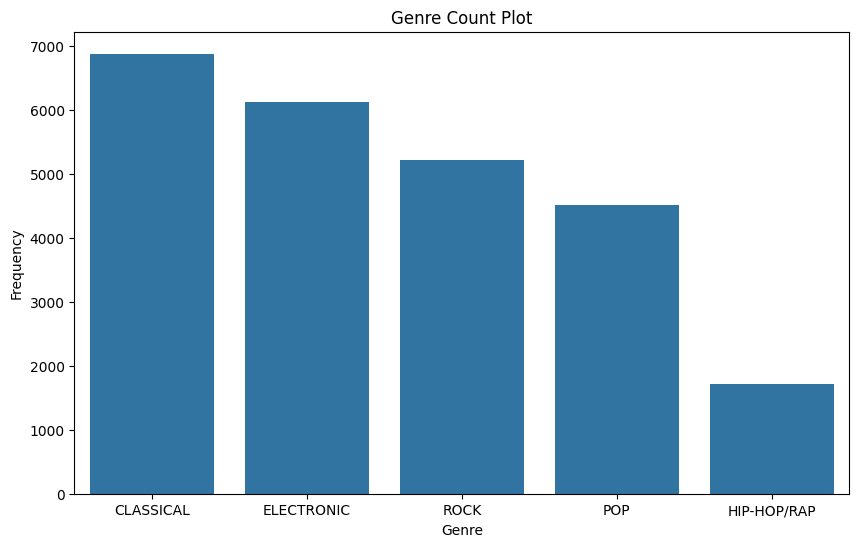

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the 'track_genre' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df_grouped, x='track_genre', order=df_grouped['track_genre'].value_counts().index)

# Set the title and labels
plt.title('Genre Count Plot')
plt.xlabel('Genre')
plt.ylabel('Frequency')


plt.show()

We observe that there are a pretty even distribution of genre categories, with the exception of hip-hop/rap having by far the fewest. This will be important to keep in mind for future models, it may be hard to predict the hip hop category.

In order to adress this, we considered balancing our dataset by undersampling the other four categories. However, this would lead to a much smaller amount of data to work with, so instead we will just drop the hip-hop/rap entries. This creates a classification problem into 4 genres which simplifies it, while still leaving us ample data to work with.

In [ ]:
df_grouped = df_grouped[df_grouped['track_genre'] != 'HIP-HOP/RAP']
print (df_grouped.shape)

(22749, 16)


## Data Preprocessing

Divide data into training and testing splits with stratification of target column to keep consistent proportions of each genre

In [ ]:
from sklearn.model_selection import train_test_split

y = df_grouped['track_genre']
X = df_grouped.drop(columns=['track_genre'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

Standardize data for proper comparison of distance metrics

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Random Forest Model

First we will tune the hyper-parameters of our random-forest model. In our case this involves determining the number of estimators and the max depth that will provide the training data with the highest accuracy classification, which is done through a grid search parameter grid. We include 5 fold-cross validation with each training score, to ensure that the model does not overfit its parameters to specific training splits.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30,100],
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,        # 5-fold cross-validation
)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 20, 'n_estimators': 200}
Best cross-validation score: 0.7676794584914947


Now that the model is tuned, we will grab the highest preforming hyper-parameters to establish a final random forest model, that is cross-validated on our entire training data and scored on our testing data. This measures the model's stability and ability to generalize to our unseen data.

In [ ]:
# Extract the best estimator from GridSearchCV
best_rf = grid_search.best_estimator_

# Perform cross-validation on the training set
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

# Train the best model on the entire training dataset
best_rf.fit(X_train, y_train)

# Evaluate the model on the test dataset
test_accuracy = best_rf.score(X_test, y_test)
print("Final model test set accuracy:", test_accuracy)

Cross-validation scores: [0.76126374 0.7771978  0.77115385 0.76263736 0.76614455]
Mean cross-validation accuracy: 0.7676794584914947
Final model test set accuracy: 0.7762637362637362


### Random Forest Model Conclusion

Given that our classification problem is to sort into 4 classes with roughly even presence in the data, our baseline accuracy if the model was just sorting randomly would be around 0.25. Therefore, we are very happy with our model's ability to predict correctly with scores 0.76-0.77 because it shows it has learned significantly from the training process. Additionally, because the training and testing accuracies are extremely similar, this indicates that we have not over-fit to the training set which is very important. So this was a very successful model, and is capable of achieving our goal of sorting songs into genres to a relatively high degree of accuracy.

# Project Conclusion

Despite attempting multiple other feature selection, dimension reduction, and machine learning models (which we detail in the appendix), we were most satisfied with the results of this random forest model on our full standardized training data. As described above, we are happy with our model accuracy and feel that we were successful in accomplishing our goal of multi-class genre classification. This provides nice insights into our music dataset, and proves that there are in fact quantitative differences between music from distinct genres.